# 1. Introduction

**Milestone 2**

Nama : Khalif Prabowo Santoso

Batch : Pondok Indah - 029

**Dalam Melaksanakan Tugas Milestone 2, Saya Memilih Dataset Yang Bertujuan Untuk Memprediksi Harga Premi Asuransi Per-Tahun. Hal Ini Di Latar Belakangi Oleh Masih Banyaknya Orang Yang Meremehkan Biaya Pengobatan Dan Juga Banyak Orang Yang Tidak Siap Ketika Dihadapi Dengan Penyakit Berat Lalu Pada Akhirnya Bisa Menguras Harta Mereka. Untuk Itu, Disini Saya Akan Menjembatani Mereka Yang Sudah Siap Serta Berencana Untuk Menggunakan Asuransi. Sehingga, Mereka Dapat Terlebih Dahulu Menghitung Estimasi Biaya Berdasarkan Kondisi Mereka Saat Ini. Jadi, Mereka Bisa Melakukan Perencanaan Dalam Menyisihkan Sebagian Harta Mereka Untuk Sesuatu Yang Bermanfaat Yaitu Memproteksi Financial Mereka. Model Yang Digunakan Menggunakan Random Forest Regressor Dikarenakan Memiliki Nilai MAE Terendah Dari Beberapa Model Yang Digunakan. Sehingga, Hasil Predict Akan Lebih Akurat Jika Dibandingkan Dengan Model-Model Yang Digunakan Pada Project Ini.**

# 2. Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import kendalltau
from sklearn.preprocessing import StandardScaler, MinMaxScaler, FunctionTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import make_scorer, mean_absolute_percentage_error,mean_absolute_error
import pickle
# Model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from utils import replaceBMI

# 3. Data Loading

In [2]:
# Load Datasets
df = pd.read_csv('Medicalpremium.csv')
df

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,No,No,No,No,155,57,No,No,0,25000
1,60,Yes,No,No,No,180,73,No,No,0,29000
2,36,Yes,Yes,No,No,158,59,No,No,1,23000
3,52,Yes,Yes,No,Yes,183,93,No,No,2,28000
4,38,No,No,No,Yes,166,88,No,No,1,23000
...,...,...,...,...,...,...,...,...,...,...,...
981,18,No,No,No,No,169,67,No,No,0,15000
982,64,Yes,Yes,No,No,153,70,No,No,3,28000
983,56,No,Yes,No,No,155,71,No,No,1,29000
984,47,Yes,Yes,No,No,158,73,Yes,No,1,39000


In [3]:
# Show Dataframe Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      986 non-null    int64 
 1   Diabetes                 986 non-null    object
 2   BloodPressureProblems    986 non-null    object
 3   AnyTransplants           986 non-null    object
 4   AnyChronicDiseases       986 non-null    object
 5   Height                   986 non-null    int64 
 6   Weight                   986 non-null    int64 
 7   KnownAllergies           986 non-null    object
 8   HistoryOfCancerInFamily  986 non-null    object
 9   NumberOfMajorSurgeries   986 non-null    int64 
 10  PremiumPrice             986 non-null    int64 
dtypes: int64(5), object(6)
memory usage: 84.9+ KB


Breakdown Dataframe Information

In [4]:
# Show DataFrame Shapes
df.shape

(986, 11)

In [5]:
# Show Duplicated
df.duplicated().sum()

0

In [6]:
# Check Missing Values
df.isna().sum()

Age                        0
Diabetes                   0
BloodPressureProblems      0
AnyTransplants             0
AnyChronicDiseases         0
Height                     0
Weight                     0
KnownAllergies             0
HistoryOfCancerInFamily    0
NumberOfMajorSurgeries     0
PremiumPrice               0
dtype: int64

In [7]:
# Check Dtypes
df.dtypes

Age                         int64
Diabetes                   object
BloodPressureProblems      object
AnyTransplants             object
AnyChronicDiseases         object
Height                      int64
Weight                      int64
KnownAllergies             object
HistoryOfCancerInFamily    object
NumberOfMajorSurgeries      int64
PremiumPrice                int64
dtype: object

***Berdasarkan Hasil Data Loading Terlihat, Bahwa:***
- Nama-nama Dari Columns Dataframenya
- Shape Dataframe (986 Rows, 11 Columns)
- No Duplicated Row
- No Missing Values
- Semua Columns Data Typenya Berupa 'int64' (Integer)

# 4. EDA

### 1. Seperti Apa Distribusi Usia Pada Peserta Insurance?

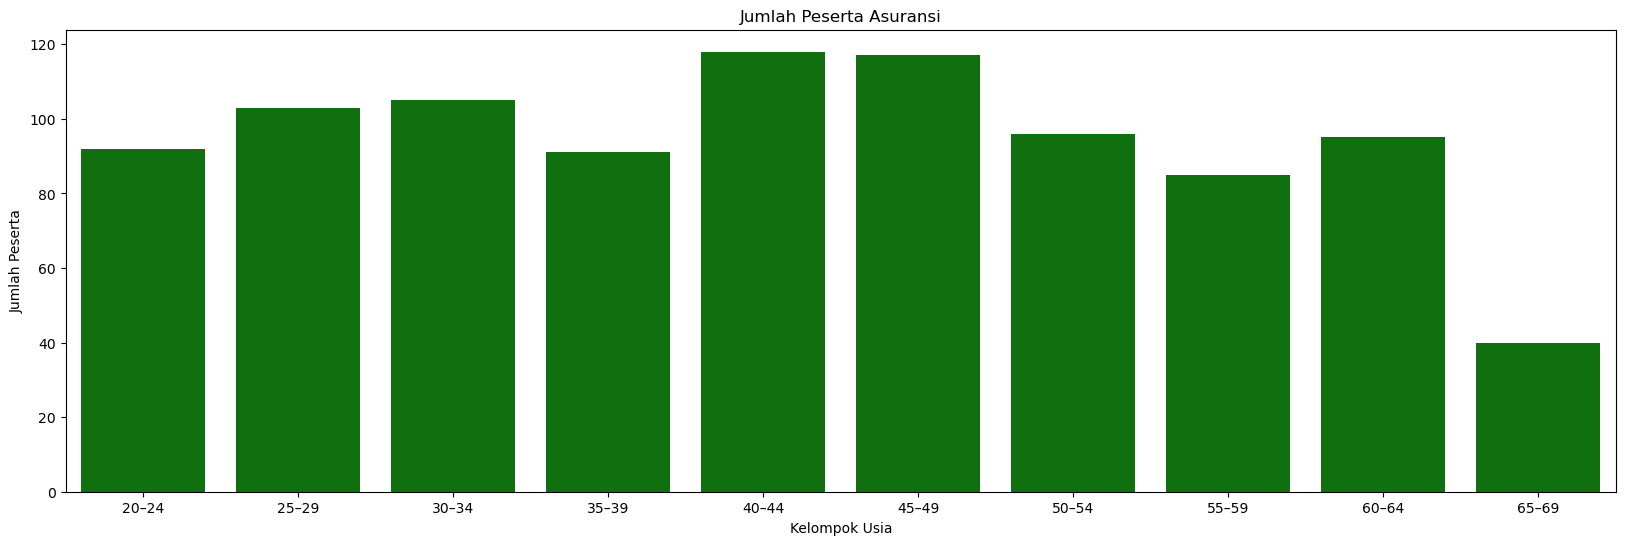

In [8]:
plt.figure(figsize=(20,6))

bins = [20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70]
labels = ['20–24', '25–29', '30–34', '35–39', '40–44', 
          '45–49', '50–54', '55–59', '60–64', '65–69']

age_group = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

counts = age_group.value_counts().sort_index()

sns.barplot(x=counts.index, y=counts.values, color='green')
plt.xlabel('Kelompok Usia')
plt.ylabel('Jumlah Peserta')
plt.title('Jumlah Peserta Asuransi')
plt.show()

Berdasarkan Hasil Visualisasi, Terlihat Bahwa:
- Rentang Usia Yang Memiliki Insurance Berdasarkan Data Ada Di 'Age' 20 - 69 Tahun.
- Terlihat Bahwa Berdasarkan Kelompok Usianya, Kelompok Umur 65-69 Tahun Sedikit Sekali Pesertanya Yang Memilki Asuransi (Dibawah 60 Orang).
- Terlihat Bahwa Kelompok Umur Selain 65-69, Rata-Rata Pesertanya Diatas 80 Orang.

Sehingga, Berdasarkan Domain Knowledge. Mereka (Kelompok Usia 65-69 Tahun) Telat Untuk Memiliki Asuransi Sehingga Jika Baru Mulai Untuk Membuka Pada Usia 65 Keatas Relatif Lebih Mahal. Oleh Karena Itu, Mungkin Itu Adalah Alasan Mengapa Sangat Sedikit Peserta Dalam Kelompok 65-69 Tahun. Jadi, Bisa Juga Alasan Masih Ada Beberapa Peserta Dikelompok 65-69 Tahun Yang Memiliki Asuransi Dikarenakan Sudah Mempunya Dari Lama (Di Usia Muda Sehingga Harga Premi Relatif Lebih Murah) Dan Mereka Yang Baru Membuka Di Kelompok Usia 65-69, Mungkin Relatif Lebih Mampu Dikarenakan Pasti Harga Preminya Lebih Mahal Dikarenakan Semakin Tuanya Umur Saat Membuka Asuransi. (Hal Ini Dapat Dibuktikan Di EDA Terkait Korelasi Antara Age Dengan PremiumPrice).

### 2. Apakah BMI(Body Mass Index) Memiliki Hubungan Terkait Besarnya PremiumPrice?

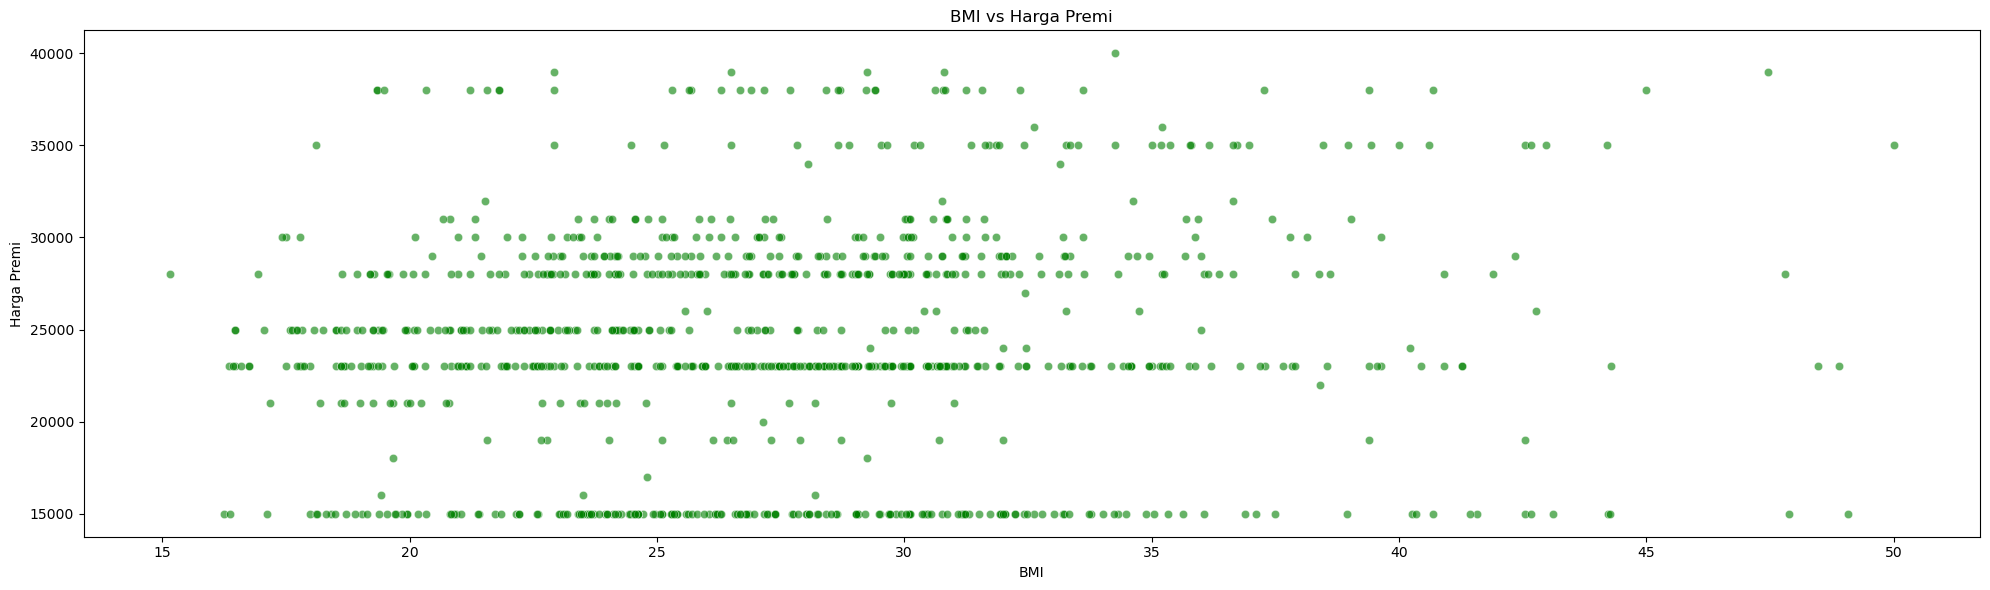

In [9]:
bmi = df['Weight'] / ((df['Height'] / 100) ** 2)

plt.figure(figsize=(20,6))
sns.scatterplot(x=bmi,y=df['PremiumPrice'],color='green',alpha=0.6)

plt.title('BMI vs Harga Premi')
plt.xlabel('BMI')
plt.ylabel('Harga Premi')
plt.tight_layout()
plt.show()

Berdasarkan Hasil Visualisasinya, Terlihat: 
- BMI Sedikit Berpengaruh Dalam Besarnya PremiumPrice.
- Hal Ini Terlihat Bahwa Pada Visualisasi Scatter Plot Mereka Tersebar Secara Hampir Merata.
- Sebagai Contoh Ada Orang Dengan BMI 20 Dan Ada Juga Dengan BMI 35-50 Tetapi PremiumPrice Tetap Sama Di Angka $15.000.
- Sehingga Berdasarkan Hal Ini, Ada Faktor/Feature Lain Yang Lebih Berpengaruh Terhadap Besar Kecilnya PremiumPrice.

### 3. Bagaimana Distribusi Peserta Berdasarkan NumberOfMajorSurgeries?

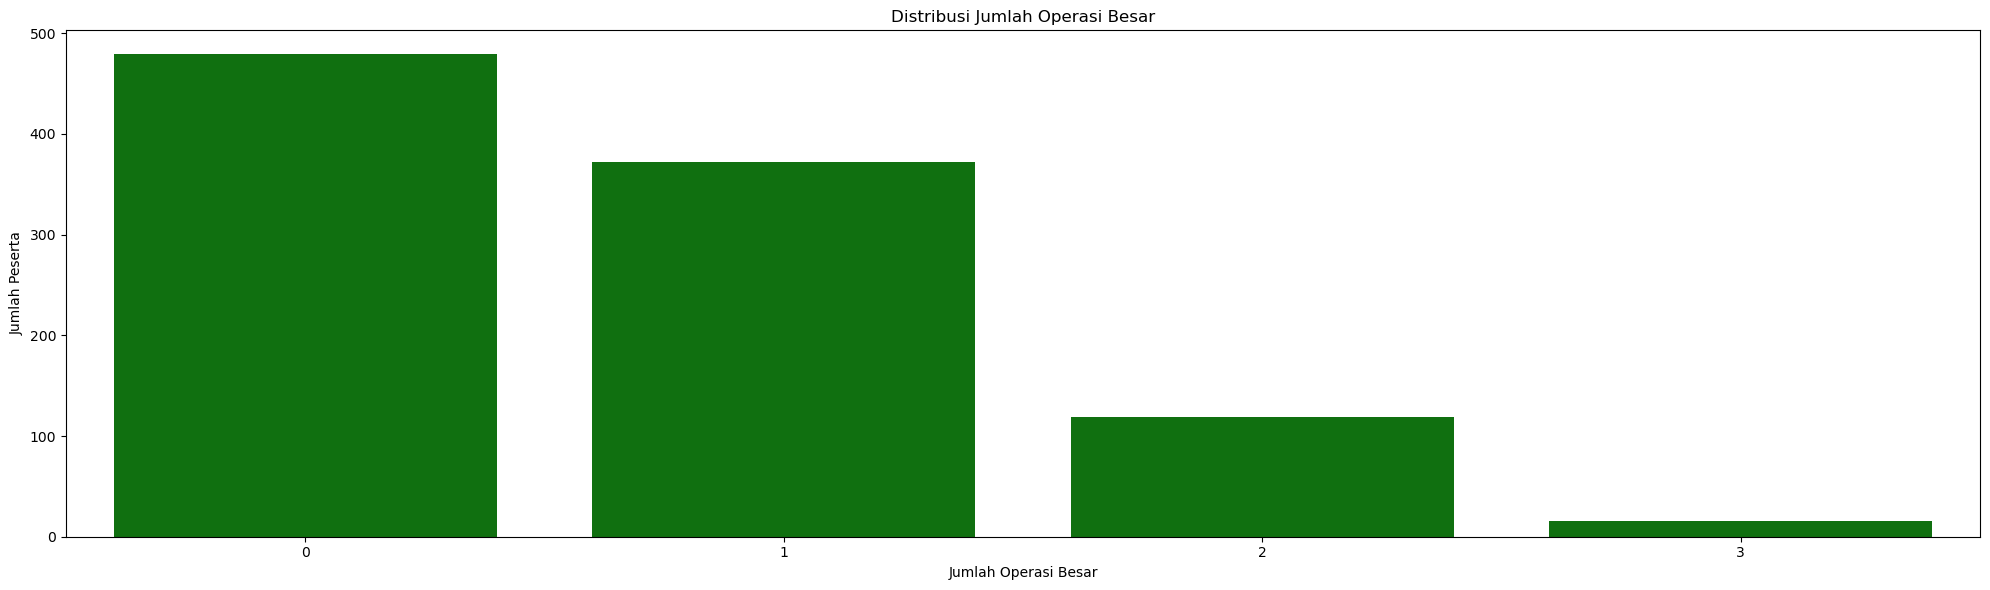

In [10]:
plt.figure(figsize=(20,6))

sns.countplot(x=df['NumberOfMajorSurgeries'], color='green')

plt.title('Distribusi Jumlah Operasi Besar')
plt.xlabel('Jumlah Operasi Besar')
plt.ylabel('Jumlah Peserta')
plt.tight_layout()
plt.show() 

Berdasarkan Hasil Visual, Terlihat Bahwa:
- Ternyata NumberOfMajorSurgeries Berdasarkan Dataset Ini, Didominasi Oleh Orang Yang Tidak Pernah Melakukan MajorSurgeries (0).
- Dilanjutkan Secara Berturut-turut Berdasarkan Jumlahnya, Yaitu Yang Pernah 1x Melakukan MajorSurgeries Berada Di Posisi Kedua.
- Dilanjutkan Dengan Orang Yang Pernah 2x Melakukan MajorSurgeries Diurutan Ketiga.
- Dan Terakhir Yang Pernah 3x Melakukan MajorSurgeries Berada Diposisi Terakhir.

Sehingga, Berdasarkan Asumsi Mungkin NumberOfMajorSurgeries Berpengaruh Terhadap PremiumPrice. Dimana, NumbersOfMajorSurgeries 0 Mendominasi Berdasarkan Hasil Datanya Dapat Diasumsikan Bahwa Orang Dengan NumbersOfMajorSurgeries 0 Lebih Siap Terhadap Resiko Kedepannya Untuk Itu Mereka Memilih Untuk Memiliki Asuransi Dan Harganya Pun Relatif Lebih Murah Pastinya Dibandingkan Dengan Orang Yang Memiliki NumbersOfMajorSurgeries > 0. Karena, Mereka Berasumsi Mungkin Karena Telah Melakukan 1x MajorSurgeries Kedepannya Tidak Ada Lagi MajorSurgeries Yang Akan Mereka Lakukan Dan Mungkin Juga Harganya Relatif Lebih Mahal Dari Situlah Mungkin Adanya Pengurangan Peserta Berdasarkan NumbersOfMajorSurgeries-nya.

### 4. Correlation Numerical Feature Dengan Target (PremiumPrice) 

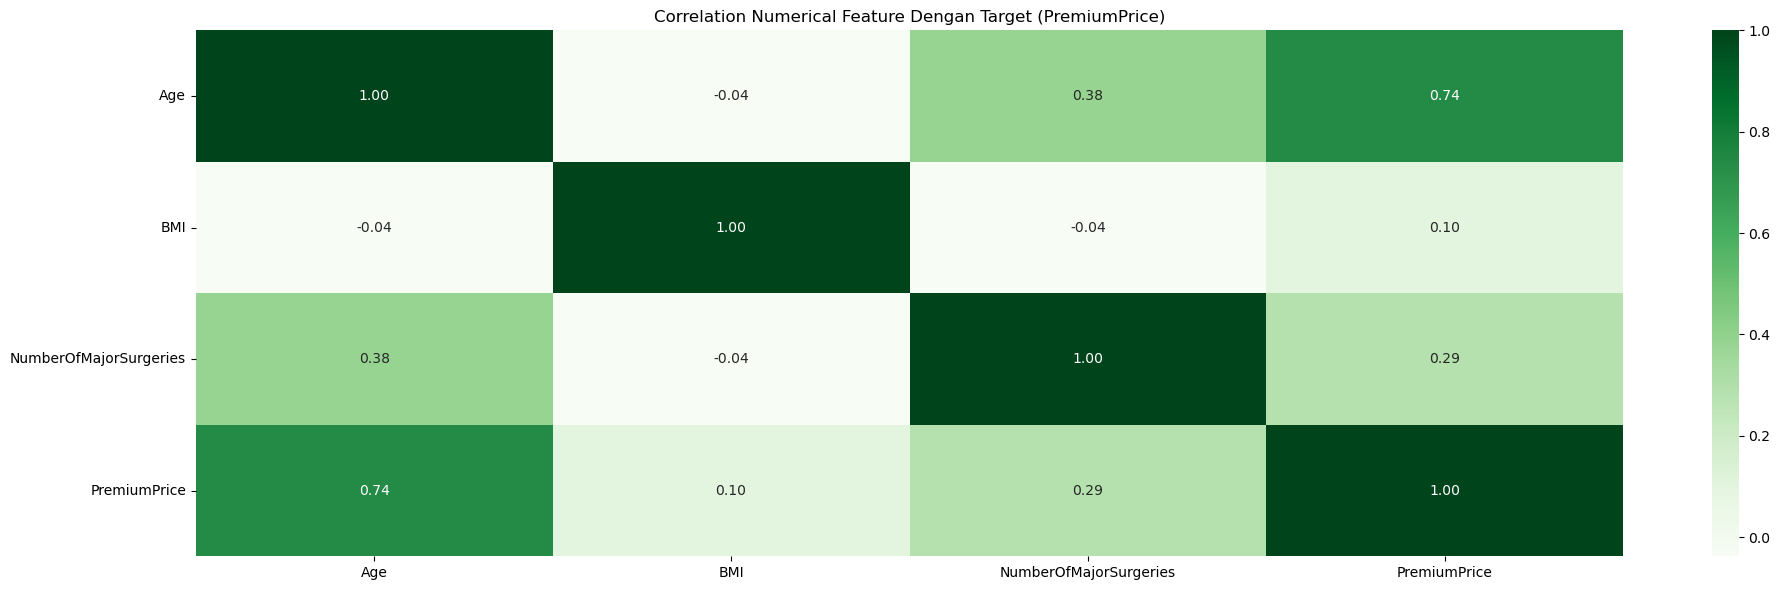

In [11]:
num_df = pd.DataFrame({
    'Age': df['Age'],
    'BMI': bmi,
    'NumberOfMajorSurgeries': df['NumberOfMajorSurgeries'],
    'PremiumPrice': df['PremiumPrice']
})

# Hitung korelasi
corr = num_df.corr(method='spearman')

# Plot heatmap
plt.figure(figsize=(20,6))
sns.heatmap(corr, annot=True, cmap='Greens', fmt='.2f')

plt.title('Correlation Numerical Feature Dengan Target (PremiumPrice)')
plt.tight_layout()
plt.show()

Berdasarkan Hasil Visual, Terlihat Bahwa:
1. Heatmap Ini Dihitung Menggunakan Correlation Spearman Dimana Setengah Data Numerikal Distribusinya Skewed Sehingga Penggunaan Spearman Ini Lebih Fleksibel Terhadap Data Yang Distribusinya Skewed/Normal.
2. Terlihat Bahwa Age Memiliki Strong Correlation Dengan PremiumPrice, Yang Mana Angka Dalam Age Ini Sangat Berpengaruh Dalam PremiumPrice.
3. NumberOfMajorSurgeries Mereka Memiliki Weak Correlation Terhadap PremiumPrice Sehingga Cukup Berpengaruh Tetapi Tidak Signifikan.
4. BMI Memiliki Very Weak Correlation Dengan PremiumPrice, Dapat Dibuktikan Juga Pada EDA Nomor 2 Bahwa Pesebaran Distribusi PremiumPrice Berdasarkan BMI Itu Merata.

### 5. Berdasarkan Hasil Correlation Numerical Dengan Target, Apakah Benar Bahwa Hubungan Age dengan PremiumPrice Itu Adalah 'Strong Correlation'?

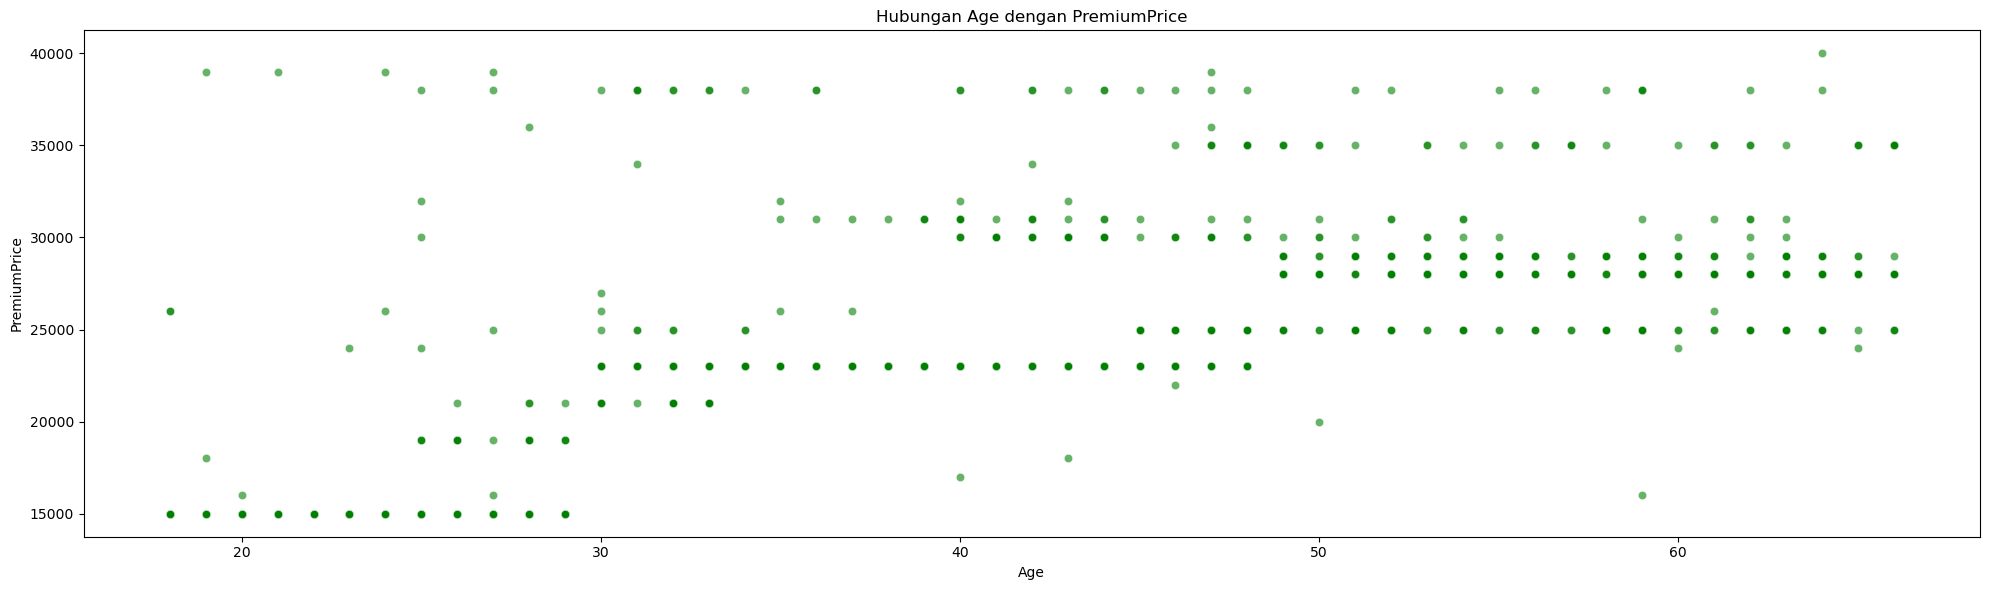

In [12]:
plt.figure(figsize=(20, 6))
sns.scatterplot(x='Age', y='PremiumPrice', data=df, color='green', alpha=0.6)
plt.title('Hubungan Age dengan PremiumPrice')
plt.xlabel('Age')
plt.ylabel('PremiumPrice')
plt.tight_layout()
plt.show()

Berdasarkan Visualisasi, Terlihat Bahwa:
- Age Cukup Berpengaruh Pada PremiumPrice, Dapat Dilihat Bahwa Kelompok Umur 50-60 Memiliki Pesebaran Yang Lebih Berkumpul Pada PremiumPrice Diatas $25.000.
- Walaupun Ada Juga Pada Kelompik Umur 20-40 Yang Memiliki PremiumPrice Yang Cukup Tinggi Juga.

Sehingga, Dapat Diasumsikan Bahwa Walaupun Correlation Age Dengan PremiumPrice Cukup Tinggi. Akan Tetapi, Ada Faktor Lain Yang Juga Cukup Berpengaruh Dalam PremiumPrice. Dibuktikan Pada Poin 2 (Walaupun Ada Juga Pada Kelompik Umur 20-40 Yang Memiliki PremiumPrice Yang Cukup Tinggi Juga).

### 6. Bagaimana Penyebaran BMI dalam Kelompok Diabetes?

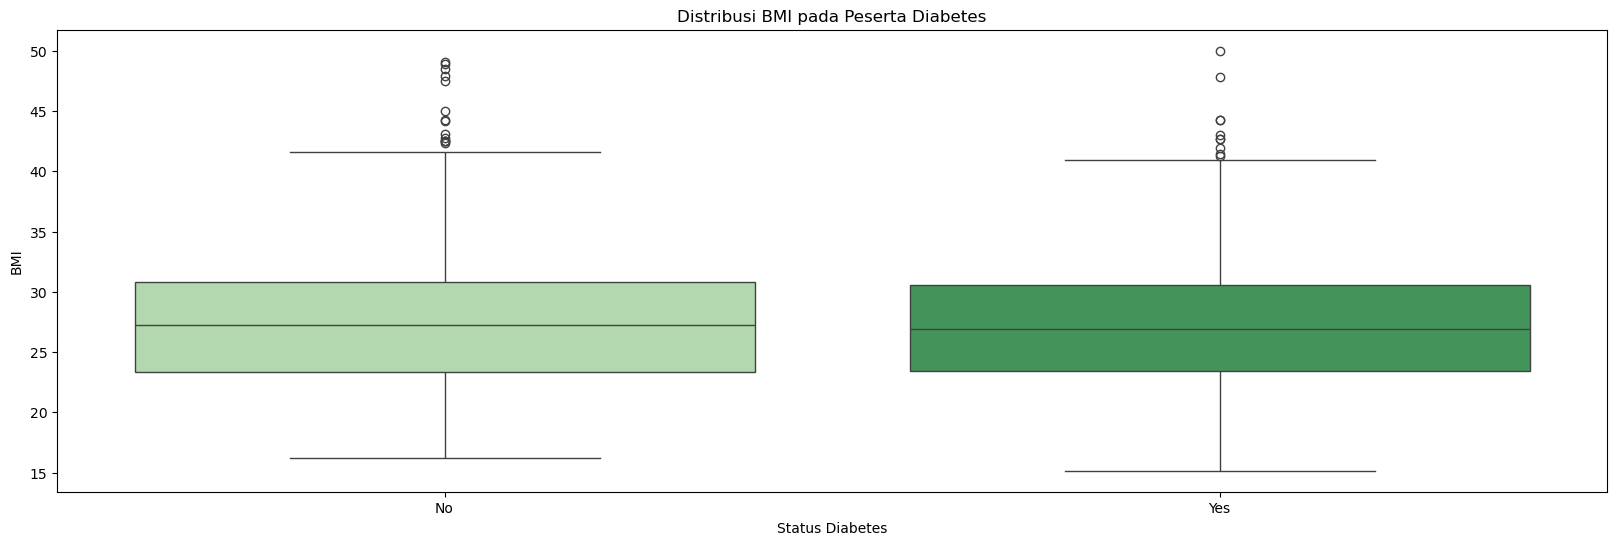

In [13]:
plt.figure(figsize=(20,6))
sns.boxplot(x='Diabetes', y=bmi, data=df,hue= df['Diabetes'], palette='Greens')
plt.title('Distribusi BMI pada Peserta Diabetes')
plt.xlabel('Status Diabetes')
plt.ylabel('BMI')
plt.show()

Berdasarkan Hasil Visualisasi, Terlihat Bahwa:
- Median BMI Pada Orang Yang Memiliki Diabetes Sedikit Lebih Tinggi Dibandingkan Yang Tidak Memiliki Diabetes.
- Namun, Rentang IQRnya Relatif Serupa Antar 2 Kelompok Ini.
- Juga Pada Outliersnya Terlihat Serupa Walaupun BMI Pada Orang Dengan Diabetes Memiliki BMI Lebih Tinggi.

Sehingga, Terdapat Sedikit Kecenderungan Bahwa BMI Yang Lebih Tinggi Pada Individu Yang Mengidap Diabetes Dengan Yang Tidak.

### 7. Bagaimana Korelasi Antara NumberOfMajorSurgeries & Diabetes Vs Target?

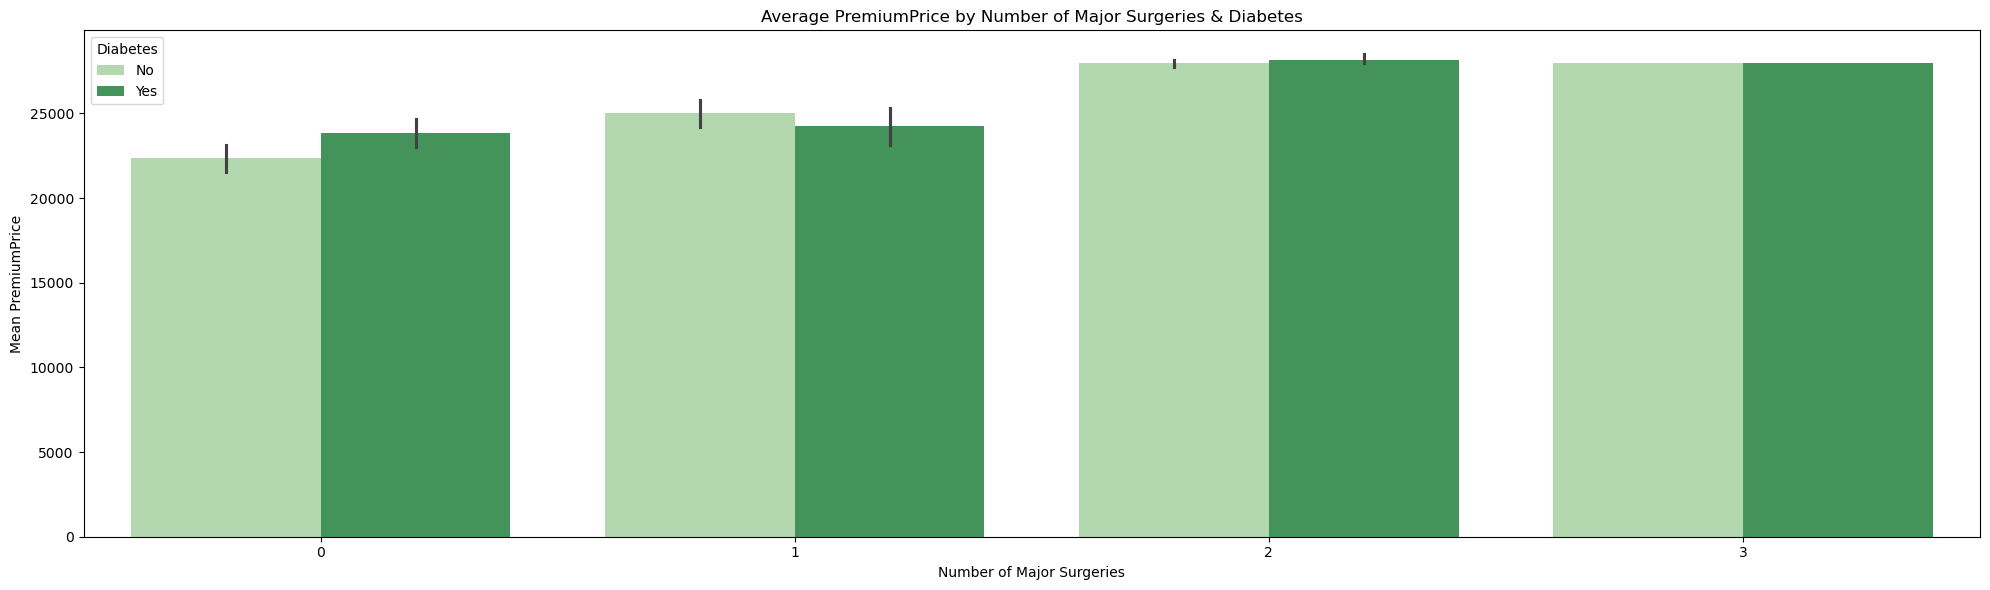

In [75]:
plt.figure(figsize=(20,6))
sns.barplot(
    x='NumberOfMajorSurgeries', 
    y='PremiumPrice', 
    hue='Diabetes', 
    data=df, 
    estimator='mean', 
    palette='Greens'
)

plt.title("Average PremiumPrice by Number of Major Surgeries & Diabetes")
plt.xlabel("Number of Major Surgeries")
plt.ylabel("Mean PremiumPrice")
plt.legend(title='Diabetes')
plt.tight_layout()
plt.show()

Berdasarkan Hasil Visual, Terlihat Bahwa:
- Secara General NumberOfMajorSurgeries Memiliki Pengaruh Yang Lebih Besar Terhadap PremiumPrice.
- Tetapi Pada Visual Ini Terlihat Adapun Orang Yang Tidak Memiliki Diabetes Ternyata Harga Preminya Bahkan Lebih Tinggi Dari Yang Memiliki Diabtes.
- Dan Pada NumberOfMajorSurgeries = 3,Terlihat Bahwa PremiumPrice Antara Diabetes & Tidak Terlihat Setara.

Sehingga NumberOfMajorSurgeries Pada Dataset Ini Memiliki Pengaruh Lebih Bisa Jika Dibandingkan Diabetes, Adapun Feature-Feature Lain Yang Tentu Berpengaruh Terhadap PremiumPrice Ini Selain Diabetes & NumberOfMajorSurgeries.

### Insights

Berdasarkan Hasil EDA, Bahwa Ada Beberapa Faktor Yang Mempengaruhi Harga Asuransi Mulai Dari Yang Sangat Berpengaruh Dan Yang Tidak Terlalu Berpengaruh. Tetapi, Berdasarkan Kesimpulan Singkat Bahwa Yang Paling Mempengaruhi PremiumPrice Adalah Age. Sehingga, Membuka Rekening Asuransi Semakin Cepat Maka Semakin Baik, Dimana Aset Dapat Terlindungi Dan PremiumPrice Juga Relatif Lebih Murah.

# 5. Feature Engineering

### a. Handling Cardinality

In [14]:
# Show Categorical Columns
pd.set_option('display.max_colwidth', None)

cat_cols = df[['Diabetes', 'BloodPressureProblems', 'AnyTransplants',	'AnyChronicDiseases',	'KnownAllergies','HistoryOfCancerInFamily']].columns.tolist()

listItem = []
for col in cat_cols:
  listItem.append([col, df[col].nunique(), df[col].unique()])

Cardinality = pd.DataFrame(columns=['Column Name', 'Unique Values', 'Values'], data=listItem)
Cardinality

,Column Name,Unique Values,Values
0,Diabetes,2,"[No, Yes]"
1,BloodPressureProblems,2,"[No, Yes]"
2,AnyTransplants,2,"[No, Yes]"
3,AnyChronicDiseases,2,"[No, Yes]"
4,KnownAllergies,2,"[No, Yes]"
5,HistoryOfCancerInFamily,2,"[No, Yes]"


Ini Adalah Hasil Dari Cardinality, Dimana Walaupun Pada 'Data Loading' Terlihat Semua Type Datanya 'int64'. Namun, Secara Value Asli Column-Column Ini Memiliki Values Categorical Nominal.

- Index 0 - 5 -> [No,Yes] -> Maka Valuenya Adalah Categorical Nominal.
- Dan Karena Nilai Cardinality Rendah Maka Tidak Ada Handling Pada Columns Ini.

### b. Melakukan Split Antara Feature (X) Dan Target (y)


In [15]:
# Split Feature & Target
X = df.drop(['PremiumPrice'], axis=1)
y = df['PremiumPrice']

In [16]:
# Show X
X.columns

Index(['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries'],
      dtype='object')

In [17]:
# Show y
y

0      25000
1      29000
2      23000
3      28000
4      23000
       ...  
981    15000
982    28000
983    29000
984    39000
985    15000
Name: PremiumPrice, Length: 986, dtype: int64

Terlihat Bahwa Pada X(Feature), Column 'Premium Price'Telah Hilang. Dan Column 'Premium Price' Berada Pada y(Target).

### c. Melakukan Spliting Antara Train Set Dan Test Set


In [18]:
# Split Train & Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 25)
print('Train Size', X_train.shape)
print('Test Size', X_test.shape)

Train Size (887, 10)
Test Size (99, 10)


Spliting Size Train: 887 Rows (90% Dari X), Spliting Size Test: 99 Rows (10% Dari X)

### d. Handling Missing Values

Missing Values Sudah Aman, Dibuktikan Pada Saat Proses 'Data Loading' Sudah Mencari Nilai Missing Values.

In [19]:
missing_values = pd.DataFrame({
    'X_train': X_train.isnull().sum(),
    'X_test': X_test.isnull().sum()
})
print('Make Sure Missing Values Dataset')
print(missing_values)

Make Sure Missing Values Dataset
                         X_train  X_test
Age                            0       0
Diabetes                       0       0
BloodPressureProblems          0       0
AnyTransplants                 0       0
AnyChronicDiseases             0       0
Height                         0       0
Weight                         0       0
KnownAllergies                 0       0
HistoryOfCancerInFamily        0       0
NumberOfMajorSurgeries         0       0


Terlihat Bahwa Benar Tidak Ada Missing Values Baik Di Train Maupun Di Test.

### e. Handling Outliers


In [20]:
# Cari Column Numerical Untuk Mencari Outliers
num_cols = ['Age', 'Height', 'Weight','NumberOfMajorSurgeries']
num_cols

['Age', 'Height', 'Weight', 'NumberOfMajorSurgeries']

In [21]:
# Check Nilai Skewness, Type Distribution, Lower Boundary, Upper Boundary, Percentage Total Outlier
listItem = []
columns = []
skews = []
dists = []
lower_bounds = []
upper_bounds = []
outlier_percents = []

for col in num_cols:
    skew_val = round(X_train[col].skew(), 1)
    dist = 'normal' if -0.5 <= skew_val <= 0.5 else 'skewed'

    Q1 = X_train[col].quantile(0.25)
    Q3 = X_train[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 3 * IQR
    upper = Q3 + 3 * IQR
    
    outlier_pct = (
        ((X_train[col] < lower) | (X_train[col] > upper)).sum() / len(X_train) * 100
    )

    columns.append(col)
    skews.append(skew_val)
    dists.append(dist)
    lower_bounds.append(round(lower, 2))
    upper_bounds.append(round(upper, 2))
    outlier_percents.append(round(outlier_pct, 1))

summary = pd.DataFrame({
    'Nama Kolom': columns,
    'Nilai Skewness': skews,
    'Distribution': dists,
    'Lower Boundary': lower_bounds,
    'Upper Boundary': upper_bounds,
    'Percentage Total Outlier': outlier_percents
})
summary

,Nama Kolom,Nilai Skewness,Distribution,Lower Boundary,Upper Boundary,Percentage Total Outlier
0,Age,0.0,normal,-39.0,122.0,0.0
1,Height,-0.2,normal,116.0,221.0,0.0
2,Weight,0.6,skewed,7.0,147.0,0.0
3,NumberOfMajorSurgeries,0.9,skewed,-3.0,4.0,0.0


In [22]:
# Untuk Membandingkan Nilai Max - Min Dengan Upper Boundary - Lower Boundary
X_train[num_cols].describe().round(5).T

,count,mean,std,min,25%,50%,75%,max
Age,887.0,41.75085,13.90884,18.0,30.0,42.0,53.0,66.0
Height,887.0,168.33484,10.12248,145.0,161.0,168.0,176.0,188.0
Weight,887.0,76.88501,14.23292,51.0,67.0,75.0,87.0,132.0
NumberOfMajorSurgeries,887.0,0.66967,0.74988,0.0,0.0,1.0,1.0,3.0


Berdasarkan Hasil Nilainya & Perbandingannya Terlihat, Bahwa:
1. Age & Height
- Pada Age Dan Height Distribusinya Adalah 'Normal'
- Juga Pada Pengecekan Nilai ***'Age'*** Dengan .describe(). ***(Nilai Max -> 66) Dan (Nilai Min -> 18) Yang Mana Nilainya Masih Didalam Rentang (Upper Boundary = 122) Dan (Lower Boundary -> -39)***.
- Juga Pada Pengecekan Nilai ***'Height'*** Dengan .describe(). ***(Nilai Max -> 188) Dan (Nilai Min -> 145) Yang Mana Nilainya Masih Didalam Rentang (Upper Boundary = 221) Dan (Lower Boundary -> 116)***.
- **Sehingga** Tidak Akan Di Capping Pada 'Age' & 'Height'.

2. Weight & NumberOfMajorSurgeries
- Pada Weight & NumberOfMajorSurgeries Distribusinya Adalah 'Skewed' (Tidak Normal)
- Walaupun Pada Pengecekan Nilai ***'Weight'*** Dengan .describe(). ***(Nilai Max -> 132) Dan (Nilai Min -> 51) Yang Mana Nilainya Masih Didalam Rentang (Upper Boundary = 147) Dan (Lower Boundary -> 7)***.
- Walaupun Juga Pada Pengecekan Nilai ***'NumberOfMajorSurgeries'*** Dengan .describe(). ***(Nilai Max -> 3) Dan (Nilai Min -> 0) Yang Mana Nilainya Masih Didalam Rentang (Upper Boundary = 4) Dan (Lower Boundary -> -3)***.
- **Sehingga** Dikarenakan Nilainya Masih Dalam Batas Tetapi Distribusinya Skewed Dan Secara Percentagenya Pun Terlihat 0%. Maka Kita Mengasumsikan Bahwa 'Skewed' Yang Terjadi Dikarenakan Distribusi Datanya Yang Asymmetric Bukan Dikarenakan Outliers. Untuk Itu Untuk Saat Ini Tidak Ada Handle Yang Akan Dilakukan.

### f. Splitting Between Numerical And Categorical Columns

In [23]:
num_cols

['Age', 'Height', 'Weight', 'NumberOfMajorSurgeries']

In [24]:
cat_cols

['Diabetes',
 'BloodPressureProblems',
 'AnyTransplants',
 'AnyChronicDiseases',
 'KnownAllergies',
 'HistoryOfCancerInFamily']

### g. Feature Selection

Melakukan Feature Selection Untuk Melihat Column Apa Saja Yang Nanti Akan Dilanjutkan Kedalam Feature Encoding & Feature Scaling.

#### Multicollinearity Features Check (VIF) (Korelasi Antar Features) (Numeric).

In [25]:
# Check VIF Score
vif_score = X_train[num_cols]

vif_data = pd.DataFrame()
vif_data["Feature"] = vif_score.columns
vif_data["VIF Score"] = [variance_inflation_factor(vif_score.values, i) for i in range(vif_score.shape[1])]
print(vif_data)

                  Feature  VIF Score
0                     Age  12.111971
1                  Height  36.653024
2                  Weight  28.265578
3  NumberOfMajorSurgeries   2.208790


Berdasarkan Hasil VIF, Terlihat Bahwa:
- Height Dan Weight Memiliki Nilai VIF Yang Tinggi.
- Sedangkan Age Memiliki Multicollinearity Yang Sedikit Tinggi Yaitu 12.1 (>10).
- Dan NumberOfMajorSurgeries VIF Yang Cukup Rendah Yaitu (<10)

Sehingga:
- Setelah Dilakukan Penelitian Pada Height & Weight, Untuk Saat Ini Kita Bisa Melakukan Feature Creation Yaitu BMI, Yang Hasilnya Mungkin Dapat Memiliki Nilai VIF Yang Rendah Sehingga Terhindar Dari Multicollinearity.

In [26]:
# Copy Untuk Check BMI
check_hw = vif_score.copy()

In [27]:
# Melakukan Compute BMI
check_hw['BMI'] = check_hw['Weight'] / ((check_hw['Height']/100)**2)
check_hw.drop(columns=['Height', 'Weight'], inplace=True)

In [28]:
# Check VIF Score Setelah Replace Height Weight Dengan BMI
vif_data_new = pd.DataFrame()
vif_data_new["Feature"] = check_hw.columns
vif_data_new["VIF Score"] = [variance_inflation_factor(check_hw.values, i) for i in range(check_hw.shape[1])]
print(vif_data_new)

                  Feature  VIF Score
0                     Age   8.798381
1  NumberOfMajorSurgeries   2.196471
2                     BMI   7.029164


Berdasarkan Hasilnya Ternyata Setelah Melakukan Replace Height & Weight Dengan BMI, VIF Scorenya Menurun Cukup Banyak BMInya Yang Merupakan Hasil Dari Gabungan Height & Weight Memiliki VIF Score Yang Rendah. Sehingga Untuk Menghindari Multicollinearity Pada Height Dan Weight Dapat Disolusikan Dengan Menggunakan BMI (BMI = Weight / (Height/100)**2), Sehingga Kita Bisa Menambahkan Column BMI Berdasarkan Height Dan Weight Dan Setelah Mendapat Nilai BMI Selanjutnya BMI Ini Akan Ditambahkan Kedalam Dataframenya Sebagai Column Baru Lalu Melakukan Drop Columns Pada Height Dan Weight Dimana Kedua Nilai Ini Sudah Direpsentasikan Dengan Nilai BMI.

Selanjutnya Setelah Dilakukan Replacement Ini(Height,Weight), Ternyata Pada Column Age VIFnya Pun Ikut Turun Ke Angka 8.8 (<10).

Sehingga, Sekarang Hasilnya Bagus. Untuk Itu Handling Pada Numerical Columns Ini Kita Hanya Akan Replace Height + Weight Menjadi BMI.

#### Correlation Check (Feature Vs Target)

##### Numerical Vs Target

In [29]:
check_hw['target'] = y_train.copy()
corr_target = check_hw.corr(method='spearman')['target'].sort_values(ascending=False)
print(corr_target)

target                    1.000000
Age                       0.732899
NumberOfMajorSurgeries    0.291858
BMI                       0.106079
Name: target, dtype: float64


Berdasarkan Hasil Korelasi Antar Feature Numerical Dengan Target:
- Age -> Strong Correlation.
- NumberOfMajorSurgeries -> Weak Correlation.
- BMI -> Very Weak Correlation.

In [30]:
def kendall_features(X, y, cat_cols):
    results = []
    for col in cat_cols:
        # hanya untuk kolom dengan nilai Yes/No
        unique_vals = X[col].dropna().unique()
        if set(unique_vals) == {'Yes', 'No'}:
            # ubah Yes/No jadi 1/0
            x_bin = X[col].map({'No': 0, 'Yes': 1})

            tau, p_val = kendalltau(x_bin, y)

            if p_val < 1e-4:
                p_val_str = " <0.0001"
            else:
                p_val_str = f"{p_val:.4f}"

            results.append({
                'Feature': col,
                'kendall-tau': round(tau, 3),
                'p-value': p_val_str
            })

    cor = pd.DataFrame(results).sort_values(by='p-value')
    cor.reset_index(drop=True, inplace=True)
    return cor

In [31]:
kendalres = kendall_features(X_train, y_train, cat_cols)
print(kendalres.to_string(index=False))

                Feature  kendall-tau  p-value
  BloodPressureProblems        0.184  <0.0001
         AnyTransplants        0.188  <0.0001
     AnyChronicDiseases        0.182  <0.0001
HistoryOfCancerInFamily        0.116  <0.0001
               Diabetes        0.080   0.0062
         KnownAllergies        0.007   0.8239


Berdasarkan Hasil Korelasi Antar Feature Yang Memili Value Binary (Categorical Nominal) Dengan Target Menggunakan (Kendall):
- BloodPressureProblems, AnyTransplant, AnyChronicDiseases, Diabetes, HistoryOfCancerInFamily Memiliki P-Value < 0.05 Sehingga Menunjukkan Adanya Correlation
- Sedangkan Pada KnownAllergies P-Value > 0.05 Sehingga Menunjukkan Tidak Adanya Correlation Berdasarkan P-Valuenya, Namun Untuk Saat Ini KnownAllergies Akan Diretain Mengingat Jika Mengacu Pada Domain Knowledge Alergi Berpengaruh Terhadap Harga Premi.

#### Kesimpulan

Berdasarkan Persepective Correlation (Feature Vs Feature), (Feature Numerical Vs Target), (Feature Categorical Vs Target) Kita Dapat Menyimpulkan Bahwa:
1. Feature Vs Feature(VIF Numerikal):
- 3 Dari 4 Feature Memiliki VIF Score > 10 (Adanya Multicollinearity). Yaitu Adalah (Age, Height, Weight).
- Solusinya Adalah Replace Height + Weight Dengan BMI Dan Setelah Dilihat Hasil VIF Scorenya Ternyata BMI (Replacement Columns) & Age Menjadi Lebih Baik Yaitu (<10).

2. Feature Numerical Vs Target(Spearman):
- Berdasarkan Hasil Feature Yang Baru (Sudah Ada BMI) Ternyata Hasil Korelasi Pada Age Memiliki 'Strong Correlation' Dan BMI Memiliki Correlation Yang 'Very Weak' Dengan Target.Yang Mana Pada Saat VIF(Feature Vs Feature) BMI Ini Memiliki VIF Score Rendah. Sehingga Keputusannya Adalah Tetap Meretain BMI Karena VIF Score Rendah.

3. Feature Categorical Nominal (Yes/No) Vs Target (Kendall):
- Untuk Column Categorical Nominal (Yes/No) Yang Nilainya Ternyata P-Value < 0.05 Sehingga Column-Column Ini Akan Di Retain.Begitupun, Column KnownAllergies Yang P-Value > 0.05, Karena Jika Mengacu Pada Domain Knowledge Terkait KnownAllergies Seperti Yang Disebutkan Sebelumnya Bahwa Hal Ini Berpengaruh Terhadap Harga Premi.

#### Solution Step

In [32]:
# Define bmi Dalam FucntionTransformer (replaceBMI Ada Di Dalam utils.py)
bmi = FunctionTransformer(replaceBMI, validate=False)

Define Function Yang Akan Dimasukkan Kedalam Pipeline Dengan Function Transformer Sehingga Perubahan Columnnya Nanti Akan Dikerjakan Didalam Pipeline.

### h. Feature Encoding

In [33]:
# Check Columns Untuk Di Encode.
Cardinality

,Column Name,Unique Values,Values
0,Diabetes,2,"[No, Yes]"
1,BloodPressureProblems,2,"[No, Yes]"
2,AnyTransplants,2,"[No, Yes]"
3,AnyChronicDiseases,2,"[No, Yes]"
4,KnownAllergies,2,"[No, Yes]"
5,HistoryOfCancerInFamily,2,"[No, Yes]"


Berdasarkan Dari Values Column-Column Categorical, Terlihat Valuenya Harus Di Encode Pada Values Yang Memiliki Nilai [No,Yes] Secara OneHotEncoder Dikarenakan Categoricalnya Nominal.

In [34]:
encoder = OneHotEncoder(handle_unknown='ignore',sparse_output=False) 

### i. Feature Scaling

**Berdasarkan Hasil Solusi 'Feature Selection',Bahwa:**
1. Age
- Column Age Memiliki Distribusi 'Normal'.
- Maka Column Ini Akan Di Scale Menggunakan 'StandardScaler()' (Cara Scaling Untuk Data Normal).
2. BMI (Height & Weight) & NumberOfSurgeries
- Column Height + Weight Yang Akan Dijadikan Columns BMI, Setelah Di Check Skewnessnya Ternyata Nilainya Skewed.
- Sehingga Karena BMI Ini Merupakan Feature Creation Yang Didapat Melalui Function Transformation Yang Akan Diproses Didalam Pipeline Maka Akan Dilakukan Handling Untuk Nilai Skewness & Scalingnya Secara Bersamaan Dengan Menggunakan RobustScaler(). Begitupun NumberOfSurgeries Yang Distribusinya Skew() Maka Akan Dilakukan Dengan RobustScaler().

In [35]:
# Check Distribusi BMI
check_hw['BMI'].skew()

0.6249164480425278

In [36]:
# Define Scaler Untuk Pipeline

# Standard Untuk Age Yang Distribusinya Normal
scaler = StandardScaler()

#MinMax Untuk BMI Yang Distribusinya Skewed
scaler_skewed = MinMaxScaler()

### j. Pipeline

In [37]:
# Check Columns
print(num_cols)

['Age', 'Height', 'Weight', 'NumberOfMajorSurgeries']


Dikarenakan Pada Numerical Antara Age Dengan Height & Weight Akan Diperlakukan Berbeda, Maka Columnya Akan Dipisahkan.

In [38]:
num_cols = ['Age']
num_skew = ['Height', 'Weight','NumberOfMajorSurgeries'] 
print(num_cols)
print(num_skew)
print(cat_cols)

['Age']
['Height', 'Weight', 'NumberOfMajorSurgeries']
['Diabetes', 'BloodPressureProblems', 'AnyTransplants', 'AnyChronicDiseases', 'KnownAllergies', 'HistoryOfCancerInFamily']


Ini Adalah Hasil Akhir Dari Columnnya.

In [39]:
pipe_age = Pipeline([
('Standard', scaler)
])

pipe_bmi = Pipeline([
('ReplaceHW', bmi),
('MinMax', scaler_skewed)
])

pipe_nominal = Pipeline([
('Ohe', encoder)
])

Pipe Terdiri Dari 3:
- pipe_age Akan Memprosses Dengan StandardScaler().
- pipe_bmi Akan Memprosses Function bmi, Dilanjutkan Dengan MinMaxScaler()
- pipe_nominal akan encode dengan menggunakan OneHotEncoder.

In [40]:
transformer = ColumnTransformer([
    ('age' , pipe_age, num_cols),
    ('bmi', pipe_bmi, num_skew),
    ('nominal', pipe_nominal, cat_cols)
], remainder = 'passthrough')

Lalu Dilakukan Transform Pada Masing-Masing Pipeline, Dimana:
- age Berisikan pipe_age Akan Memproses num_cols.
- bmi Akan Memprosses Height-Weight Dan Replace Menjadi BMI Lalu BMI Bersamaan Dengan NumberOfMajorSurgery Dilakukan MinMaxScaler().
- Terakhir, pipe_nominal Akan Memproses Sisa Column Yang Belum Di Encode (Semua Column cat_cols) Dengan Menggunakan OHE.

In [41]:
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('age',
                                 Pipeline(steps=[('Standard',
                                                  StandardScaler())]),
                                 ['Age']),
                                ('bmi',
                                 Pipeline(steps=[('ReplaceHW',
                                                  FunctionTransformer(func=<function replaceBMI at 0x13e7aa980>)),
                                                 ('MinMax', MinMaxScaler())]),
                                 ['Height', 'Weight',
                                  'NumberOfMajorSurgeries']),
                                ('nominal',
                                 Pipeline(steps=[('Ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Diabetes', 'BloodPressureProblems',
                                  'AnyTransplants', 'AnyChronicDiseases',
                                  'KnownAllergies',
                                  'HistoryOfCancerInFamily'])])

Visualisasi Hasil Column Transformer.

# Model Definition

Dalam Modeling Dilakukan Dengan 5 Model

In [42]:
# Define Model
knr = KNeighborsRegressor()
svr = SVR()
dtr = DecisionTreeRegressor()
rfr = RandomForestRegressor()
gbr = GradientBoostingRegressor()

In [43]:
# Define Pipe Dengan Menambahkan Model Setelah Transform
pipe_knr = Pipeline([('transform', transformer),
                     ('KNR', knr)])

pipe_svr = Pipeline([('transform', transformer),
                     ('SVR', svr)])

pipe_dtr = Pipeline([('transform', transformer),
                     ('DTR', dtr)])

pipe_rfr = Pipeline([('transform', transformer),
                     ('RFR', rfr)])

pipe_gbr = Pipeline([('transform', transformer),
                     ('GBR', gbr)])

Ini Adalah 5 Pipe Baru Yang Telah Ditambahkan Model Setelahnya.

# Model Training

In [44]:
# Fit X_train, y_train Pada pipe_knr
pipe_knr.fit(X_train, y_train)

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('age',
                                                  Pipeline(steps=[('Standard',
                                                                   StandardScaler())]),
                                                  ['Age']),
                                                 ('bmi',
                                                  Pipeline(steps=[('ReplaceHW',
                                                                   FunctionTransformer(func=<function replaceBMI at 0x13e7aa980>)),
                                                                  ('MinMax',
                                                                   MinMaxScaler())]),
                                                  ['Height', 'Weight',
                                                   'NumberOfMajorSurgeries']),
                                                 ('nominal',
                                                  Pipeline(steps=[('Ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Diabetes',
                                                   'BloodPressureProblems',
                                                   'AnyTransplants',
                                                   'AnyChronicDiseases',
                                                   'KnownAllergies',
                                                   'HistoryOfCancerInFamily'])])),
                ('KNR', KNeighborsRegressor())])

In [45]:
# Fit X_train, y_train Pada pipe_svr
pipe_svr.fit(X_train, y_train)

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('age',
                                                  Pipeline(steps=[('Standard',
                                                                   StandardScaler())]),
                                                  ['Age']),
                                                 ('bmi',
                                                  Pipeline(steps=[('ReplaceHW',
                                                                   FunctionTransformer(func=<function replaceBMI at 0x13e7aa980>)),
                                                                  ('MinMax',
                                                                   MinMaxScaler())]),
                                                  ['Height', 'Weight',
                                                   'NumberOfMajorSurgeries']),
                                                 ('nominal',
                                                  Pipeline(steps=[('Ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Diabetes',
                                                   'BloodPressureProblems',
                                                   'AnyTransplants',
                                                   'AnyChronicDiseases',
                                                   'KnownAllergies',
                                                   'HistoryOfCancerInFamily'])])),
                ('SVR', SVR())])

In [46]:
# Fit X_train, y_train Pada pipe_dtr
pipe_dtr.fit(X_train, y_train)

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('age',
                                                  Pipeline(steps=[('Standard',
                                                                   StandardScaler())]),
                                                  ['Age']),
                                                 ('bmi',
                                                  Pipeline(steps=[('ReplaceHW',
                                                                   FunctionTransformer(func=<function replaceBMI at 0x13e7aa980>)),
                                                                  ('MinMax',
                                                                   MinMaxScaler())]),
                                                  ['Height', 'Weight',
                                                   'NumberOfMajorSurgeries']),
                                                 ('nominal',
                                                  Pipeline(steps=[('Ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Diabetes',
                                                   'BloodPressureProblems',
                                                   'AnyTransplants',
                                                   'AnyChronicDiseases',
                                                   'KnownAllergies',
                                                   'HistoryOfCancerInFamily'])])),
                ('DTR', DecisionTreeRegressor())])

In [47]:
# Fit X_train, y_train Pada pipe_rfr
pipe_rfr.fit(X_train, y_train)

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('age',
                                                  Pipeline(steps=[('Standard',
                                                                   StandardScaler())]),
                                                  ['Age']),
                                                 ('bmi',
                                                  Pipeline(steps=[('ReplaceHW',
                                                                   FunctionTransformer(func=<function replaceBMI at 0x13e7aa980>)),
                                                                  ('MinMax',
                                                                   MinMaxScaler())]),
                                                  ['Height', 'Weight',
                                                   'NumberOfMajorSurgeries']),
                                                 ('nominal',
                                                  Pipeline(steps=[('Ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Diabetes',
                                                   'BloodPressureProblems',
                                                   'AnyTransplants',
                                                   'AnyChronicDiseases',
                                                   'KnownAllergies',
                                                   'HistoryOfCancerInFamily'])])),
                ('RFR', RandomForestRegressor())])

In [48]:
# Fit X_train, y_train Pada pipe_gbr
pipe_gbr.fit(X_train, y_train)

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('age',
                                                  Pipeline(steps=[('Standard',
                                                                   StandardScaler())]),
                                                  ['Age']),
                                                 ('bmi',
                                                  Pipeline(steps=[('ReplaceHW',
                                                                   FunctionTransformer(func=<function replaceBMI at 0x13e7aa980>)),
                                                                  ('MinMax',
                                                                   MinMaxScaler())]),
                                                  ['Height', 'Weight',
                                                   'NumberOfMajorSurgeries']),
                                                 ('nominal',
                                                  Pipeline(steps=[('Ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Diabetes',
                                                   'BloodPressureProblems',
                                                   'AnyTransplants',
                                                   'AnyChronicDiseases',
                                                   'KnownAllergies',
                                                   'HistoryOfCancerInFamily'])])),
                ('GBR', GradientBoostingRegressor())])

# Model Evaluation

Dalam Proses Model Evaluation, Kita Akan Menilainya Dengan Metrics MAE dan MAPE, Dimana Hasil Terbaik MAE dan MAPE Adalah Yang Memiliki Nilai Terkecil. Lalu Untuk Membandingkan Nanti Jika Telah Melakukan Predict, Selain Nilai MAE dan MAPE Terkecil Kita Akan Melihat Juga Selisih Dari Hasil Train Dan Testnya Untuk Menentukan Mana Model Yang Terbaik Dengan Mendefine Apakah Model Underfit, Goodfit, Overfit.

#### 1. Cross Validation

In [49]:
# Untuk Scoring MAPE
mape_scorer = make_scorer(mean_absolute_percentage_error, greater_is_better=False)

In [50]:
# Define Score Mae,Mape Untuk KNR
scores_knr = cross_val_score(pipe_knr, X_train, y_train, cv = 5, scoring='neg_mean_absolute_error')
scores_knr_mape = cross_val_score(pipe_knr, X_train, y_train, cv = 5, scoring = mape_scorer)

knr_mae = -scores_knr
knr_mape = -scores_knr_mape

In [51]:
# Define Score Mae,Mape Untuk SVR
scores_svr = cross_val_score(pipe_svr, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
scores_svr_mape = cross_val_score(pipe_svr, X_train, y_train, cv=5, scoring= mape_scorer)

svr_mae = -scores_svr
svr_mape = -scores_svr_mape

In [52]:
# Define Score Mae,Mape Untuk DTR
scores_dtr = cross_val_score(pipe_dtr, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
scores_dtr_mape = cross_val_score(pipe_dtr, X_train, y_train, cv=5, scoring= mape_scorer)

dtr_mae = -scores_dtr 
dtr_mape = -scores_dtr_mape

In [53]:
# Define Score Mae,Mape Untuk RFR
scores_rfr = cross_val_score(pipe_rfr, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
scores_rfr_mape = cross_val_score(pipe_rfr, X_train, y_train, cv=5, scoring= mape_scorer)

rfr_mae = -scores_rfr
rfr_mape = -scores_rfr_mape

In [54]:
# Define Score Mae,Mape Untuk GBR
scores_gbr = cross_val_score(pipe_gbr, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
scores_gbr_mape = cross_val_score(pipe_gbr, X_train, y_train, cv=5, scoring= mape_scorer)

gbr_mae = -scores_gbr
gbr_mape = -scores_gbr_mape

In [55]:
# Show Hasil Dari Tiap FOLD Dari Semua Score Yang Telah Di Define.
def print_metrics(name, mae_scores, mape_scores):
    print("-" * 50)
    print(f"{name}")
    print("MAE per fold :", mae_scores)
    print("MAPE per fold:", mape_scores)
   

print_metrics("K-Nearest Regressor", knr_mae, knr_mape)
print_metrics("Support Vector Regressor", svr_mae, svr_mape)
print_metrics("Decision Tree Regressor", dtr_mae, dtr_mape)
print_metrics("Random Forest Regressor", rfr_mae, rfr_mape)
print_metrics("Gradient Boosting Regressor", gbr_mae, gbr_mape)

--------------------------------------------------
K-Nearest Regressor
MAE per fold : [2034.83146067 2477.52808989 2172.88135593 2723.16384181 2742.37288136]
MAPE per fold: [0.08909632 0.09859226 0.08827142 0.11007707 0.10795948]
--------------------------------------------------
Support Vector Regressor
MAE per fold : [4523.76510655 4804.86237089 4810.98907321 5146.13777185 5141.18535671]
MAPE per fold: [0.2093702  0.21238866 0.2151952  0.24688707 0.21351501]
--------------------------------------------------
Decision Tree Regressor
MAE per fold : [1224.71910112 1803.37078652 1485.87570621 2016.94915254 2231.63841808]
MAPE per fold: [0.05464128 0.06825049 0.06634154 0.07327839 0.09204897]
--------------------------------------------------
Random Forest Regressor
MAE per fold : [1287.97752809 1619.3258427  1469.03954802 1885.36723164 1861.1299435 ]
MAPE per fold: [0.05396539 0.06189933 0.06293914 0.07555979 0.07081103]
--------------------------------------------------
Gradient Boostin

In [56]:
# Show Hasil Dari Mae Dan Mape Tiap Model
models = [
    "K-Nearest Regressor",
    "Support Vector Regressor",
    "Decision Tree Regressor",
    "Random Forest Regressor",
    "Gradient Boosting Regressor"
]

mae_all = [knr_mae, svr_mae, dtr_mae, rfr_mae, gbr_mae]
mape_all = [knr_mape, svr_mape, dtr_mape, rfr_mape, gbr_mape]

# Create Summary Table
summary = []

for model, mae_scores, mape_scores in zip(models, mae_all, mape_all):
    mean_mae = np.mean(mae_scores)
    std_mae = np.std(mae_scores)
    mean_mape = np.mean(mape_scores) * 100 
    std_mape = np.std(mape_scores) * 100
    summary.append([model, round(mean_mae, 2), round(std_mae, 2),
                    f"{mean_mape:.2f}%", f"{std_mape:.2f}%"])

crossval_summary = pd.DataFrame(summary, columns=[
    "Model", "Mean MAE", "STD MAE", "Mean MAPE (%)", "STD MAPE (%)"
])

crossval_summary

,Model,Mean MAE,STD MAE,Mean MAPE (%),STD MAPE (%)
0,K-Nearest Regressor,2430.16,285.67,9.88%,0.91%
1,Support Vector Regressor,4885.39,235.04,21.95%,1.38%
2,Decision Tree Regressor,1752.51,361.04,7.09%,1.22%
3,Random Forest Regressor,1624.57,228.69,6.50%,0.75%
4,Gradient Boosting Regressor,1864.32,237.68,7.46%,0.75%


Berdasarkan Hasil Cross Validation, Terlihat Bahwa:
1. Model Dengan MAE Terendah Ditempati Oleh Model Random Forest Regressor.
2. Dilanjutkan Oleh Decision Tree Regressor
3. Selanjutnya Gradient Boosting Regressor
4. K-Nearest Regressor
5. Dan Terakhir SVM

Sehingga, Berdasarkan Hasil Cross Validation, Model Terbaik Untuk Saat Ini Ada Random Forest Regressor. Dan Untuk Memastikan Kita Akan Melakukan Predict Dan Melihat Apakah Benar RFR Merupakan Model Terbaik Berdasarkan Nilai MAEnya.

#### 2. Predict Model

##### K-Nearest Regressor Model

In [57]:
# Define Hasil Predict KNR
y_pred_train_knr = pipe_knr.predict(X_train)
y_pred_test_knr = pipe_knr.predict(X_test)

mae_train_knr = mean_absolute_error(y_train, y_pred_train_knr)
mape_train_knr = mean_absolute_percentage_error(y_train, y_pred_train_knr) * 100

mae_test_knr = mean_absolute_error(y_test, y_pred_test_knr)
mape_test_knr = mean_absolute_percentage_error(y_test, y_pred_test_knr) * 100

print("K-Nearest Regressor")
print(f"Train MAE  : {mae_train_knr:.2f}")
print(f"Train MAPE : {mape_train_knr:.2f}%\n")
print(f"Test MAE   : {mae_test_knr:.2f}")
print(f"Test MAPE  : {mape_test_knr:.2f}%")

K-Nearest Regressor
Train MAE  : 1863.13
Train MAPE : 7.49%

Test MAE   : 2191.92
Test MAPE  : 9.05%


##### Support Vector Regressor Model

In [58]:
# Define Hasil Predict SVR
y_pred_train_svr = pipe_svr.predict(X_train)
y_pred_test_svr = pipe_svr.predict(X_test)

mae_train_svr = mean_absolute_error(y_train, y_pred_train_svr)
mape_train_svr = mean_absolute_percentage_error(y_train, y_pred_train_svr) * 100

mae_test_svr = mean_absolute_error(y_test, y_pred_test_svr)
mape_test_svr = mean_absolute_percentage_error(y_test, y_pred_test_svr) * 100

print("SVR")
print(f"Train MAE  : {mae_train_svr:.2f}")
print(f"Train MAPE : {mape_train_svr:.2f}%\n")
print(f"Test MAE   : {mae_test_svr:.2f}")
print(f"Test MAPE  : {mape_test_svr:.2f}%")

SVR
Train MAE  : 4842.79
Train MAPE : 21.50%

Test MAE   : 5057.23
Test MAPE  : 22.65%


##### Decision Tree Regressor Model

In [59]:
# Define Hasil Predict DTR
y_pred_train_dtr = pipe_dtr.predict(X_train)
y_pred_test_dtr = pipe_dtr.predict(X_test)

mae_train_dtr = mean_absolute_error(y_train, y_pred_train_dtr)
mape_train_dtr = mean_absolute_percentage_error(y_train, y_pred_train_dtr) * 100

mae_test_dtr = mean_absolute_error(y_test, y_pred_test_dtr)
mape_test_dtr = mean_absolute_percentage_error(y_test, y_pred_test_dtr) * 100

print("DTR")
print(f"Train MAE  : {mae_train_dtr:.2f}")
print(f"Train MAPE : {mape_train_dtr:.2f}%\n")
print(f"Test MAE   : {mae_test_dtr:.2f}")
print(f"Test MAPE  : {mape_test_dtr:.2f}%")

DTR
Train MAE  : 0.00
Train MAPE : 0.00%

Test MAE   : 1727.27
Test MAPE  : 7.64%


##### Random Forest Regressor Model

In [60]:
# Define Hasil Predict RFR
y_pred_train_rfr = pipe_rfr.predict(X_train)
y_pred_test_rfr = pipe_rfr.predict(X_test)

mae_train_rfr = mean_absolute_error(y_train, y_pred_train_rfr)
mape_train_rfr = mean_absolute_percentage_error(y_train, y_pred_train_rfr) * 100

mae_test_rfr = mean_absolute_error(y_test, y_pred_test_rfr)
mape_test_rfr = mean_absolute_percentage_error(y_test, y_pred_test_rfr) * 100

print("RFR")
print(f"Train MAE  : {mae_train_rfr:.2f}")
print(f"Train MAPE : {mape_train_rfr:.2f}%\n")
print(f"Test MAE   : {mae_test_rfr:.2f}")
print(f"Test MAPE  : {mape_test_rfr:.2f}%")

RFR
Train MAE  : 633.54
Train MAPE : 2.58%

Test MAE   : 1416.46
Test MAPE  : 6.60%


##### Gradient Boosting Regressor

In [61]:
# Define Hasil Predict GBR
y_pred_train_gbr = pipe_gbr.predict(X_train)
y_pred_test_gbr = pipe_gbr.predict(X_test)

mae_train_gbr = mean_absolute_error(y_train, y_pred_train_gbr)
mape_train_gbr = mean_absolute_percentage_error(y_train, y_pred_train_gbr) * 100

mae_test_gbr = mean_absolute_error(y_test, y_pred_test_gbr)
mape_test_gbr = mean_absolute_percentage_error(y_test, y_pred_test_gbr) * 100

print("GBR")
print(f"Train MAE  : {mae_train_gbr:.2f}")
print(f"Train MAPE : {mape_train_gbr:.2f}%\n")
print(f"Test MAE   : {mae_test_gbr:.2f}")
print(f"Test MAPE  : {mape_test_gbr:.2f}%")

GBR
Train MAE  : 1434.24
Train MAPE : 5.74%

Test MAE   : 1580.12
Test MAPE  : 7.17%


Kita Telah Melakukan Define Hasil Predictnya Menggunakan 5 Model Yang Telah Dipilih. Untuk Selanjutnya Kita Akan Melakukan Evaluasi Kembali Yang Bertujuan Untuk Memilih Model Terbaik Yang Akan Dilanjutkan Kedalam Hyperparameter Tuning. Maka Kesimpulan Terkait (Predict Model) Akan Dilakukan Pada Finding Best Model

#### 3. Finding Best Model (Evaluation).

##### a. Hasil Cross Validation

In [62]:
# Menampilkan Kembali Hasil Cross Validation
crossval_summary

,Model,Mean MAE,STD MAE,Mean MAPE (%),STD MAPE (%)
0,K-Nearest Regressor,2430.16,285.67,9.88%,0.91%
1,Support Vector Regressor,4885.39,235.04,21.95%,1.38%
2,Decision Tree Regressor,1752.51,361.04,7.09%,1.22%
3,Random Forest Regressor,1624.57,228.69,6.50%,0.75%
4,Gradient Boosting Regressor,1864.32,237.68,7.46%,0.75%


##### b. Hasil Predict Dengan Train & Test Set

In [63]:
# Menampilkan Hasil Train & Test Set.
datavals = [
    {
        'Model': 'K-Nearest Regressor',
        'Train MAE': f"{mae_train_knr:.2f}",
        'Train MAPE (%)': f"{mape_train_knr:.2f}%",
        'Test MAE': f"{mae_test_knr:.2f}",
        'Test MAPE (%)': f"{mape_test_knr:.2f}%"
    },
    {
        'Model': 'Support Vector Regressor',
        'Train MAE': f"{mae_train_svr:.2f}",
        'Train MAPE (%)': f"{mape_train_svr:.2f}%",
        'Test MAE': f"{mae_test_svr:.2f}",
        'Test MAPE (%)': f"{mape_test_svr:.2f}%"
    },
    {
        'Model': 'Decision Tree Regressor',
        'Train MAE': f"{mae_train_dtr:.2f}",
        'Train MAPE (%)': f"{mape_train_dtr:.2f}%",
        'Test MAE': f"{mae_test_dtr:.2f}",
        'Test MAPE (%)': f"{mape_test_dtr:.2f}%"
    },
    {
        'Model': 'Random Forest Regressor',
        'Train MAE': f"{mae_train_rfr:.2f}",
        'Train MAPE (%)': f"{mape_train_rfr:.2f}%",
        'Test MAE': f"{mae_test_rfr:.2f}",
        'Test MAPE (%)': f"{mape_test_rfr:.2f}%"
    },
    {
        'Model': 'Gradient Boosting Regressor',
        'Train MAE': f"{mae_train_gbr:.2f}",
        'Train MAPE (%)': f"{mape_train_gbr:.2f}%",
        'Test MAE': f"{mae_test_gbr:.2f}",
        'Test MAPE (%)': f"{mape_test_gbr:.2f}%"
    }
]

model = pd.DataFrame(datavals)
model

,Model,Train MAE,Train MAPE (%),Test MAE,Test MAPE (%)
0,K-Nearest Regressor,1863.13,7.49%,2191.92,9.05%
1,Support Vector Regressor,4842.79,21.50%,5057.23,22.65%
2,Decision Tree Regressor,0.00,0.00%,1727.27,7.64%
3,Random Forest Regressor,633.54,2.58%,1416.46,6.60%
4,Gradient Boosting Regressor,1434.24,5.74%,1580.12,7.17%


Berdasarkan Hasilnya:
- Semua Model Pada Train Memiliki Nilai Yang Selalu Lebih Baik Jika Dibandingkan Dengan Cross Validation Maupun Hasil Predict Pada Testnya.
- Dan Terlihat Juga Bahwa Model RFR Adalah Model Terbaik Dibuktikan Pada Hasil Metrics 'MAE' Baik Di Mean CrossValidationnya, Maupun Di Predictnya Yaitu Train Dan Testnya.
- Namun, Terlihat pada Decision Tree Yang Seharusnya Model Terbaik Ke-2 Berdasarkan CrossValidationnya Ternyata Menghasilkan Nilai Train 0 Dimana Hal Ini Bisa Terjadi Mungkin Dikarenakan Ini Telah Dilakukan Predict Dengan CrossVal Dimana DecisionTree Mampu Mengingat Hasil Dari Predict Yang Ada Di Trainnya Sehingga MAE 0% Ini Artinya Ada Data Leakage Ketika Melakukan CrossVal Lalu Predict Pada Decision Tree.
- Sehingga, Kita Akan Menggunakan Model RFR Yang Terbukti Baik Secara Nilai MAE-nya Untuk Dilanjutkan Ke Hyperparameter Tuning, Tapi Jika Dilihat Lagi Hasil Train Dan Testnya Memiliki Selisih Yang Cukup Jauh Sehingga Bisa Dikategorikan Untuk Saat Ini Model RFR Terbaik Ini Overfit.

#### 4. Hyperparamater Tuning

In [64]:
# Melakukan Hyperparameter Tuning Pada Model RFR
param_grid = {
    'RFR__n_estimators': [100, 200, 300],
    'RFR__max_depth': [None, 10, 20, 30],
    'RFR__min_samples_split': [2, 5, 10],
    'RFR__min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(pipe_rfr, param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best params: ", grid_search.best_params_)
print("Best CV score: ", grid_search.best_score_)

Best params:  {'RFR__max_depth': 10, 'RFR__min_samples_leaf': 1, 'RFR__min_samples_split': 2, 'RFR__n_estimators': 300}
Best CV score:  -1606.0669254007978


Penggunaan Parameters Dalam HyperParameter Tuning Ini Tentu Ada Alasannya, Yaitu:
- Pada n_estimator, 100 Adalah Nilai Default. Lalu Pada 200 Dan 300 Adalah Next Step Parameter Standar Dimana Rentangnya Tidak Begitu Jauh Dan Begitu Dekat Sehingga Parameter Ini Cukup Efisien.
- Pada max_depth, None Adalah Nilai Default. Lalu Pada 10,20,30 Ini Juga Adalah Rentang Yang Cukup Efisien. Dimana, Biasanya Pada max_depths Lebih Dari 30 Cenderung Menghasilkan Hasil Overfit.
- Pada min_sample_leaf, 1 Adalah Nilai Default. Lalu Pada 2 Ini Memaksa Agar Minimum Leaf 2 Untuk Melakukan Sebuah Regulasi & Pada Minimum Leaf 4 Melakukan Regulasi Yang Lebih Sempurna. Dan Berhenti Di Kenapa Berhenti Di 4, Karena Biasanya Jika Melakukan Min > 4 Menimbulkan Pula Overfit Sehingga Tidak Ada Maknanya Menggunakan minLeaf 4.
- Pada min_sample_split, 2 Adalah Default Dengan Complexitas Maximum, Dan 5,10 Adalah Untuk Regulasinya.

Berdsarkan Hasilnya, Ternyata:
- Best Params Berada Pada RFR Dengan Parameter: {'RFR__max_depth': 10, 'RFR__min_samples_leaf': 1, 'RFR__min_samples_split': 2, 'RFR__n_estimators': 300}
- Yaitu Dengan Score MAEnya: -1606.0669254007978
- Dan Berdasarkan Parameternya, MinSampleLeaf Dan MinSamplesSplit Pada BestModel Adalah Parameter Default.

In [71]:
# Visual Hasil GridSearchCV Dengan Menampilkan 3 Model Yang Terbaik Berdasarkan Nilai MAE.
pd.DataFrame(grid_search.cv_results_).sort_values(by='mean_test_score', ascending=False).head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_RFR__max_depth,param_RFR__min_samples_leaf,param_RFR__min_samples_split,param_RFR__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
29,1.291328,0.013468,0.050042,0.005321,10,1,2,300,"{'RFR__max_depth': 10, 'RFR__min_samples_leaf': 1, 'RFR__min_samples_split': 2, 'RFR__n_estimators': 300}",-1223.088913,-1618.694458,-1471.208569,-1864.564458,-1852.778229,-1606.066925,241.952818,1
57,0.449033,0.007275,0.024626,0.000716,20,1,5,100,"{'RFR__max_depth': 20, 'RFR__min_samples_leaf': 1, 'RFR__min_samples_split': 5, 'RFR__n_estimators': 100}",-1244.037550,-1630.755395,-1471.693963,-1877.858292,-1808.007409,-1606.470522,229.948070,2
84,0.456622,0.004633,0.025791,0.001663,30,1,5,100,"{'RFR__max_depth': 30, 'RFR__min_samples_leaf': 1, 'RFR__min_samples_split': 5, 'RFR__n_estimators': 100}",-1258.369125,-1596.333741,-1430.181175,-1905.862793,-1848.457611,-1607.840889,245.169070,3


In [66]:
# Melakukan Predict Dengan Best Model

bestmodel = grid_search.best_estimator_
y_pred_train_best = bestmodel.predict(X_train)
y_pred_test_best = bestmodel.predict(X_test)

In [67]:
# Alur BestModel
bestmodel

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('age',
                                                  Pipeline(steps=[('Standard',
                                                                   StandardScaler())]),
                                                  ['Age']),
                                                 ('bmi',
                                                  Pipeline(steps=[('ReplaceHW',
                                                                   FunctionTransformer(func=<function replaceBMI at 0x13e7aa980>)),
                                                                  ('MinMax',
                                                                   MinMaxScaler())]),
                                                  ['Height', 'Weight',
                                                   'NumberOfMajorSurgeries']),
                                                 ('nominal',
                                                  Pipeline(steps=[('Ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Diabetes',
                                                   'BloodPressureProblems',
                                                   'AnyTransplants',
                                                   'AnyChronicDiseases',
                                                   'KnownAllergies',
                                                   'HistoryOfCancerInFamily'])])),
                ('RFR', RandomForestRegressor(max_depth=10, n_estimators=300))])

Terlihat Pada Alur Tertulis Parameter [RandomForestRegressor(max_depth=10, n_estimators=300)] Dikarenakan Untul Min Sample Leaf Dan Min Sample Split Adalah Parameters Default.

In [68]:
# Melakukan Visual Hasil Dari Best Model Dengan Bestmodel(Hasil HyperParameter), Sekaligus Membandingkan Dengan Model Yang Sebelum Di Tuning(Default).
results = pd.DataFrame({
    'Model': ['Default', 'Tuned'],
    'Train MAE': [
        mean_absolute_error(y_train, y_pred_train_rfr ),
        mean_absolute_error(y_train, y_pred_train_best)
    ],
    'Test MAE': [
        mean_absolute_error(y_test, y_pred_test_rfr),
        mean_absolute_error(y_test, y_pred_test_best)
    ]
})

print(results)

     Model   Train MAE     Test MAE
0  Default  633.540023  1416.464646
1    Tuned  777.773527  1375.581958


Berdasarkan Hasil Akhirnya, Ternyata:
- Jika Melihat Hasil Defaultnya, Train Memiliki MAE Yang Lebih Rendah Dibandingkan Dengan Mae Pada Train Tuned.
- Tetapi Jika Melihat Hasil Testnya Ternyata MAE Hasil Test Lebih Bagus Dibandingkan Dengan MAE Hasil Train.
- Selanjutnya, Jika Melihat Selisihnya Ternyata Selisih Lebih Kecil Pada Tuned Model.

Sehingga Berdasarkan 3 Insights Ini, Model Terbaik Adalah Model Hasil Tuned Yaitu Mengacu Pada Hasil Train Test Dan Juga Selisih Antara Train Dengan Test. Namun, Walaupun Lebih Bagus Tapi Hanya Sedikit Lebih Baik Antara Default & Tuned Karena Default & Tuned Tetap Menghasilkan Model Yang 'Overfit' (Dilihat Dari MAE Train Yang Jauh Lebih Kecil Dibanding Test).  

# Model Saving

In [69]:
with open('BestRFR.pkl', 'wb') as file_1:
  pickle.dump(bestmodel, file_1)

# Model Inference

Inference Dilakukan Di:
> P1M2_Khalif_Inference.ipynb

# Conclusion

Berdasarkan Hasilnya:
- Kita Tau Bahwa Pada Saat Pengecekan Cross Validation Dan Juga Predict Bahwa Random Forest Regressor Dengan Parameter Default Merupakan Model Terbaik Dibandingkan Keempat Model Lainnya Dengan Parameter Default Juga.
- Sehingga Model Inilah Yang Akan Dilakukan Hyperparameter Tuning.
- Setelah Melakukan Hyperparameter Tuning Ternyata Ada Parameter Yang Sedikit Baik Jika Kita Melihat Selisih Dan Juga Hasil Testnya, Walaupun Pada Trainnya Jauh Lebih Buruk (Berdasarkan MAE) Yaitu Parameter Pada bestmodel.
- Walaupun Sedikit Lebih Baik, Tapi bestmodel Ini Tetap Saja Terindikasi 'Overfit'.
- Sehingga Dengan Adanya Hyperparameter Ini Membantu Untuk Mengurangi Overfitting Dengan Membuat Model Menjadi Tidak Terlalu Sensitive Terhadap Data Noise.
- Jadi Alasan Terjadinya Overfit Ini Bisa Disebabkan Oleh Feature Yang Kurang Relevan Atau Datasetnya Yang Kurang Representatif. Itulah Mengapa Pada Train Hasil MAEnya Selalu Relatif Lebih Rendah.

Sehingga Sebagai Solusi:
- Tetap Mempertahankan Parameter (bestmodel) Sebagai Kelebihan Model Ini Dikarenakan Ini Dapat Meningkatkan Hasilnya (Menurunkan Nilai MAE)
- Disisi Lain, Selidiki Lagi Terkait Feature Apakah Featurenya Berlebihan Sehingga Menimbulkan Noise.
- Juga Bisa Mengumpulakan Data Yang Lebih Repsentatif, Terlihat Dari Row Pada Dataset Ini Yang Hanya 986 Rows.

Tetapi Sebagai Model Untuk Memprediksi Harga Asuransi Jika Dilihat Dari Hasil MAEnya Mungkin Ini Kurang Baik Jika Dijadikan Patokan Untuk Benar-Benar Memprediksi Harga Premi, Tetapi Jika Benar Karena Model Kurang Repsentatif Mungkin Juga Prediksi Harganya Mendekati Benar. Namun, Sebagai Alat Untuk Memproteksi Financial. Tidak Ada Salahnya Menggunakan Acuan Model Ini Sebagai Prediksi Guna Untuk Menabung Atau Menyisihkan Penghasilan Untuk Proteksi Financial.